# Importing Functions

In [1]:
import pandas as pd
import numpy as npz
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
cancer=pd.read_csv('https://raw.githubusercontent.com/Kash48/Machine_Learning/master/cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Set Information and Understanding

In [3]:
print(cancer.shape)
print(cancer.columns)

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Attribute Information:
id
diagnosis: M = malignant, B = benign
Columns 3 to 32

Ten real-valued features are computed for each cell nucleus:

radius: distances from center to points on the perimeter

texture: standard deviation of gray-scale values

perimeter

area

smoothness: local variation in radius lengths

compactness: perimeter^2 / area - 1.0

concavity: severity of concave portions of the contour

concave points: number of concave portions of the contour

symmetry

fractal dimension: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values)
of these features were computed for each image, resulting in 30 features. For instance,
field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# Data Wrangling
In this step, I dropped ‘ID’ column, standard error and worst values of each attributes to check how the classifier will perform with the main mean values.

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#check for null values
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# remove the 'Unnamed: 32' column
cancer = cancer.drop('Unnamed: 32', axis=1)

In [7]:
cancer = cancer.drop(['id'],axis=1)

In [8]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
cancer=cancer.drop(cancer.iloc[:,11:32],axis=1)

In [10]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [11]:
#check the data type of each column
cancer.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Our response variable, diagnosis, is categorical and has two classes, 'B' (Benign) and 'M' (Malignant). All explanatory variables are numerical, so we can skip data type conversion.

Let's now take a closer look at our response variable, since it is the main focus of our analysis. We begin by checking out the distribution of its classes.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


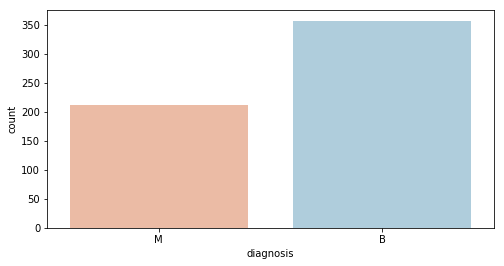

In [12]:
# visualize distribution of classes 
plt.figure(figsize=(8,4))
sns.countplot(cancer['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant =cancer['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(cancer) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(cancer) * 100, 2), '%')

Histogram plotting to visual the data frequency and density plotting for overall data distribution. Another for loop was created to plot all features. Here are the ‘radius’, ‘area’, and ‘concavity’ features:

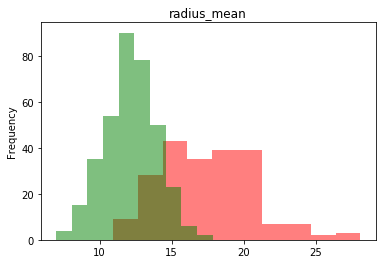

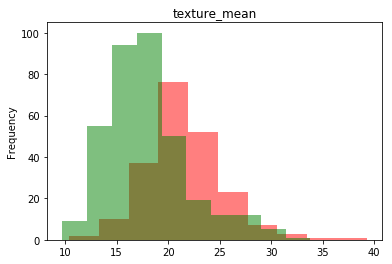

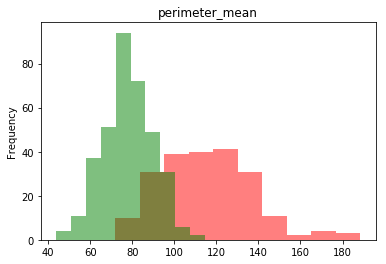

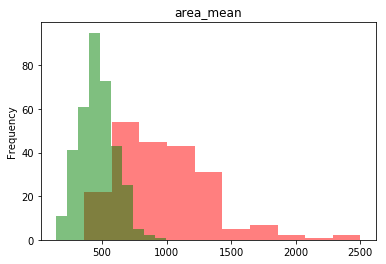

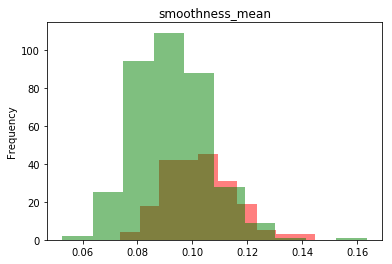

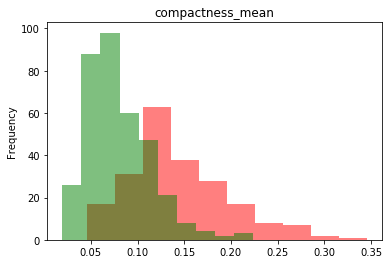

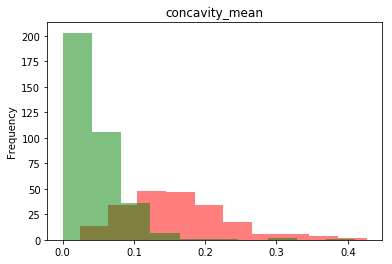

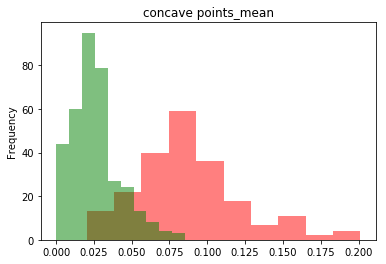

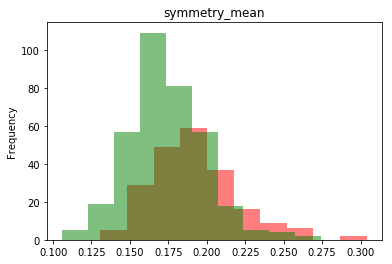

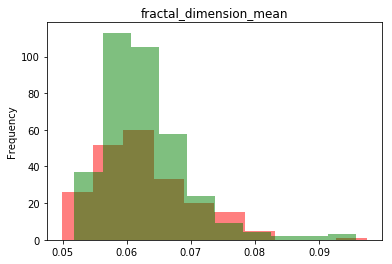

In [13]:
for i in ('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'):
    plt.figure()
    cancer[i][cancer['diagnosis']=='M'].plot.hist(alpha= 0.5, color='red', title = i)
    cancer[i][cancer['diagnosis']=='B'].plot.hist(alpha=0.5, color='green')
    plt.show()

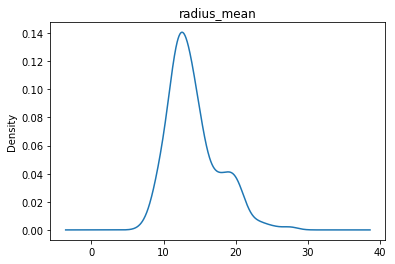

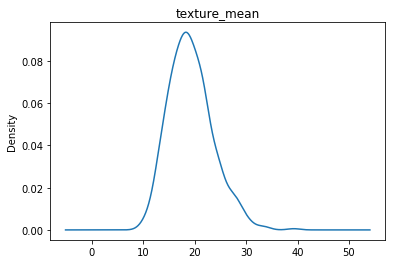

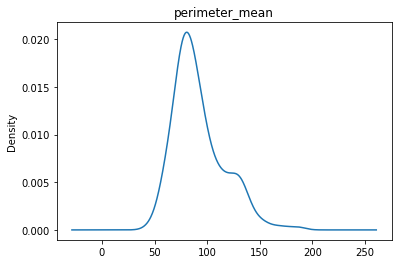

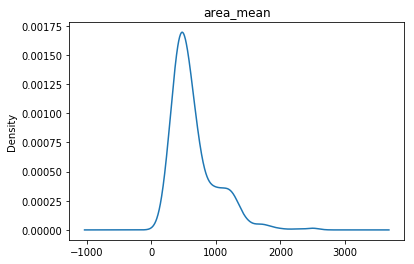

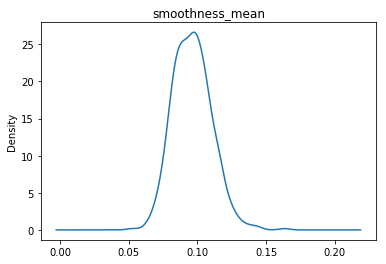

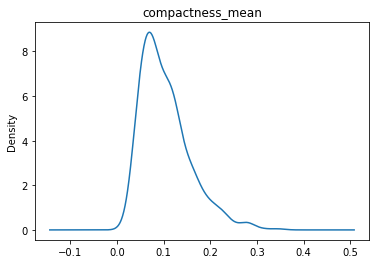

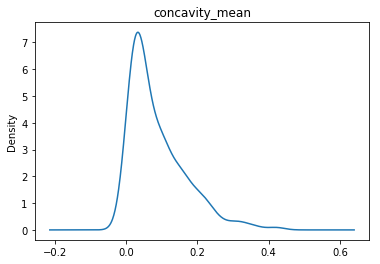

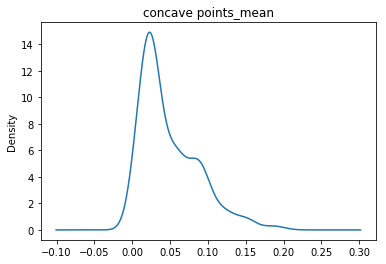

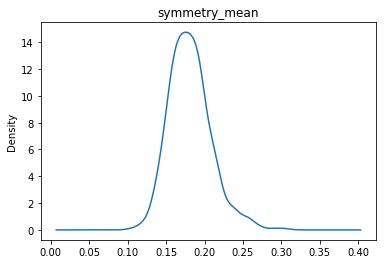

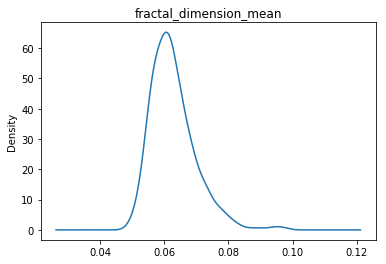

In [14]:
for i in ('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'):
    cancer[i].plot.kde(title=i)
    plt.show()

Curves are positive kurtosis and positively skewed. Clearly, this is because of less data available for malignant cells (check histogram). The second peak at radius and area density plot is because of fitting benign and malignant curves cumulatively, not because of outliers. We can see them separated as the followings:

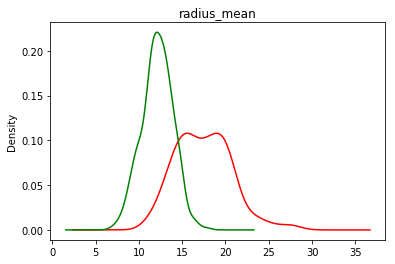

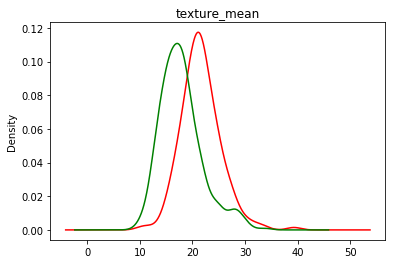

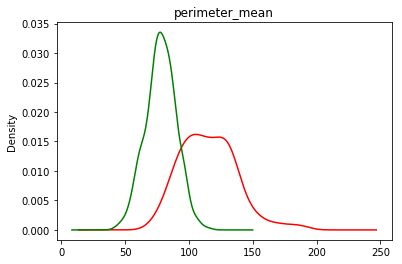

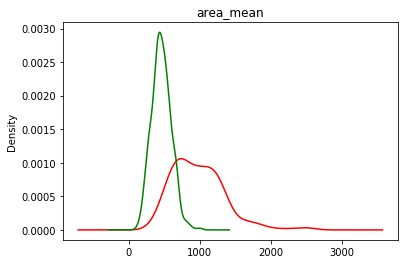

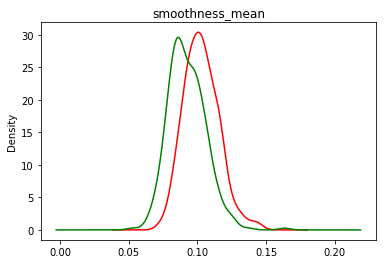

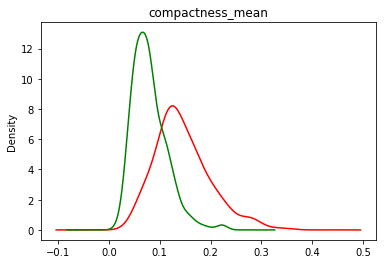

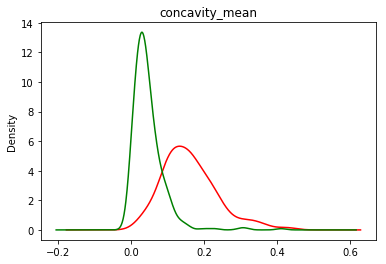

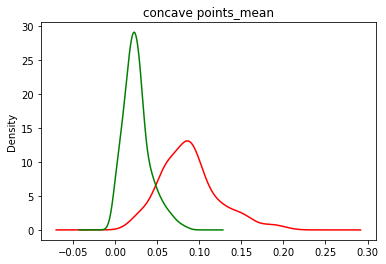

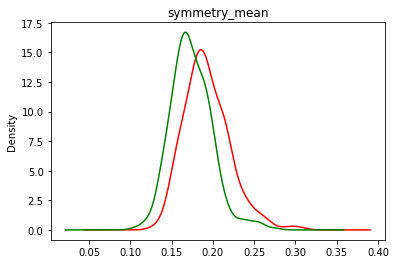

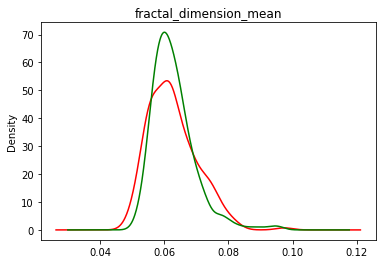

In [15]:
for i in ('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'):
    cancer[i][cancer['diagnosis']=='M'].plot.kde(title=i, c='r')
    cancer[i][cancer['diagnosis']=='B'].plot.kde(title=i, c='g')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


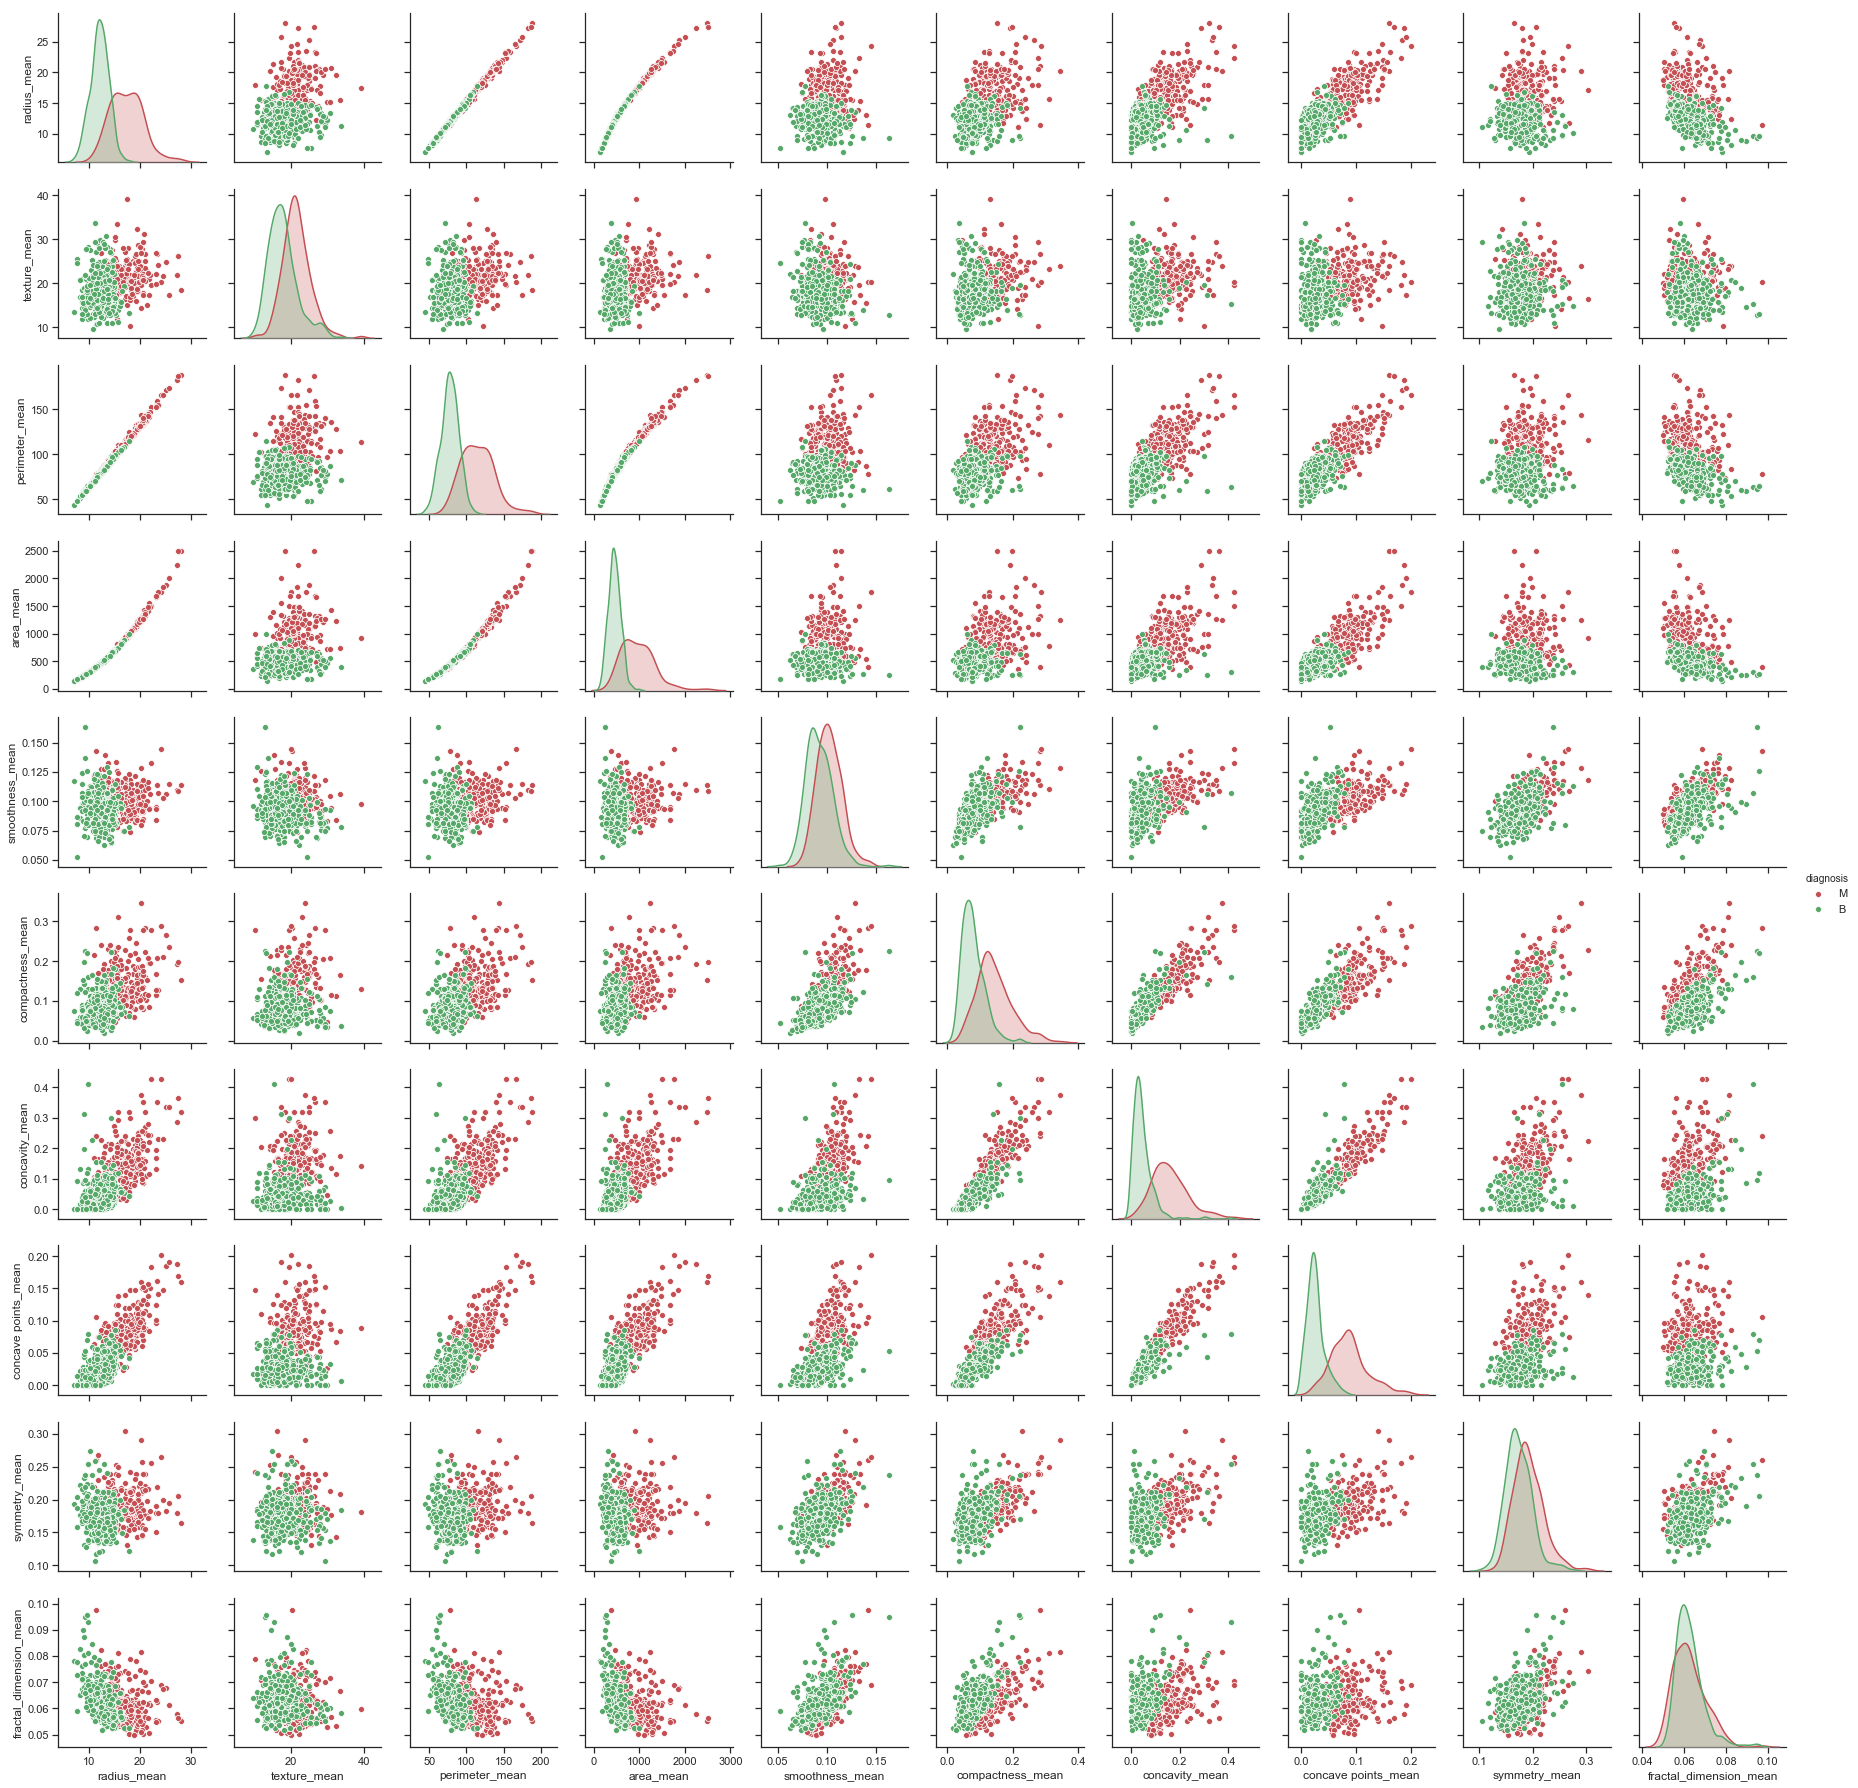

In [16]:
import seaborn as sns
sns.set(style='ticks')
sns.pairplot(cancer,palette=('r','g'),hue="diagnosis")
plt.show()

some linear relationships such as (radius vs. concave_points), (concavity vs. compactness) … etc. It seems there is an exponential relationship between radius and fractal_dimension. Since area = π(radius)² & perimeter = 2π(radius), it is expected to have the shown relationships between them. We can summarize all of that with the correlation metrics:

In [17]:
cancer.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


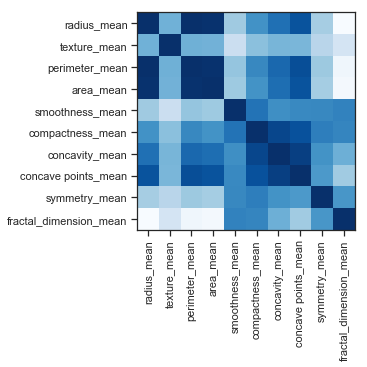

In [18]:
plt.imshow(cancer.corr(), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks=[i for i in range (len(cancer.iloc[1:11]))] #iloc is indexing to exclude diagnosos column
plt.xticks(tick_marks, cancer.iloc[:,1:11],rotation='vertical')
plt.yticks(tick_marks, cancer.iloc[:,1:11])

plt.show()

In [19]:
cancer.head()
X=cancer.iloc[:,1:]
Y=cancer['diagnosis'].copy()
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [20]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [21]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Next, I split 30% of the data to be my test input and output to score the classifier model later. The remaining is assigned to the training data set (X_train and y_train)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=12)

In [23]:
print(X_train.var())

radius_mean                   12.235069
texture_mean                  20.377333
perimeter_mean               578.782970
area_mean                 123307.382973
smoothness_mean                0.000191
compactness_mean               0.002477
concavity_mean                 0.006056
concave points_mean            0.001494
symmetry_mean                  0.000759
fractal_dimension_mean         0.000043
dtype: float64


dimensionality reduction algorithm called: principal component analysis (PCA). It models a linear subspace of a data by capturing its greatest variability. Since it’s sensitive toward the most variable data, I standard scaled all features and made their variance unified.

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
print(X_train.var())
print(X_test.var())

1.0
1.1064401105101203


In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[103,   4],
       [  8,  56]], dtype=int64)

In [29]:
#Validating the Regression Model using the score and it is 92%
classifier.score(X_test, Y_test)

0.9298245614035088

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94       107
          1       0.93      0.88      0.90        64

avg / total       0.93      0.93      0.93       171



Here I run the 10-Fold Cross Validation function on the training data. This way, the training data is first to cut into a number of “K” sets (in this case is 10). Then, “K” versions of the model are trained, each using an independent K-1 number of the “K” available sets. Each model is evaluated with the last set, it’s out-of-bag set:

In [31]:
#Model Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
crossval_scores = cross_val_score(LogisticRegression(), X_train, Y_train, cv=10)
print(crossval_scores)

[0.925      0.925      0.975      0.975      0.975      0.95
 0.95       0.9        0.94871795 0.92307692]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
from sklearn.cross_validation import cross_val_score
crossval_scores = cross_val_score(LogisticRegression(), X_train, Y_train,cv=10).mean()
print(crossval_scores)

0.9446794871794871


In [33]:
from sklearn.cross_validation import cross_val_score
results=cross_val_score(LogisticRegression(), X_train, Y_train,cv=10,scoring='roc_auc')
print("AUC:", results.mean())

AUC: 0.9903428571428572


The mean of 10 folds cross-validation accuracy is: %94.98 with AUROC (Area Under Receiver Operating Curve) = 0.99

In [37]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
random_seed=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [43]:
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import NearMiss

ModuleNotFoundError: No module named 'imblearn'

In [44]:
# from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'

In [34]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import train_test_split

# tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.7)


# #Using GridSearchCV
# model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
# model.fit(X_train, y_train)

# print(model.best_estimator_)
# print(model.score(X_test, y_test))

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [36]:
Y_pred = classifier.predict(X_test)
classifier.score(X_test, Y_test)

0.8830409356725146